In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

plt.rcParams['font.sans-serif'] = ['Source Han Sans SC']
plt.rcParams['axes.unicode_minus'] = False
sns.set_theme(font='Source Han Sans SC')

# 读取数据
file_path = '../expert_data.csv'
data = pd.read_csv(file_path)

In [2]:
print("数据基本信息:")
print(data.info())
print("\n数据统计描述:")
print(data.describe())

data['总中奖数'] = data['一等奖'] + data['二等奖'] + data['三等奖']
data['中奖率'] = data['总中奖数'] / data['发文量'] * 100  # 百分比


数据基本信息:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 33 entries, 0 to 32
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   彩龄      33 non-null     int64
 1   发文量     33 non-null     int64
 2   一等奖     33 non-null     int64
 3   二等奖     33 non-null     int64
 4   三等奖     33 non-null     int64
dtypes: int64(5)
memory usage: 1.4 KB
None

数据统计描述:
              彩龄          发文量        一等奖        二等奖        三等奖
count  33.000000    33.000000  33.000000  33.000000  33.000000
mean    9.363636  2168.121212   3.424242   4.303030  11.848485
std     4.357595  1609.761624   2.525251   2.214792   9.337830
min     1.000000   215.000000   0.000000   0.000000   0.000000
25%     8.000000  1253.000000   1.000000   3.000000   3.000000
50%    10.000000  1863.000000   3.000000   4.000000  11.000000
75%    12.000000  2711.000000   5.000000   6.000000  19.000000
max    20.000000  6984.000000  10.000000   9.000000  29.000000


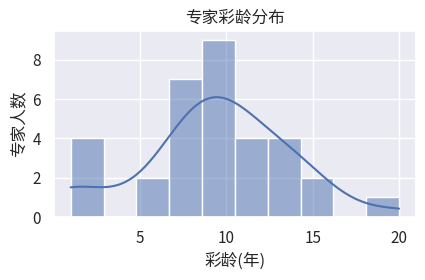

In [3]:
# 彩龄分布直方图
plt.figure(figsize=(12, 5))
plt.subplot(2, 3, 1)
sns.histplot(data['彩龄'], kde=True, bins=10)
plt.title('专家彩龄分布')
plt.xlabel('彩龄(年)')
plt.ylabel('专家人数')
plt.tight_layout()

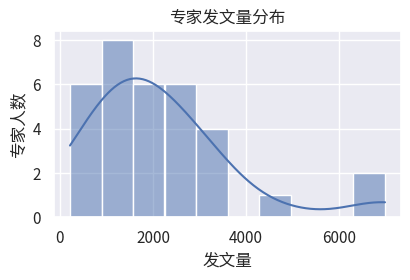

In [4]:
# 发文量分布直方图
plt.figure(figsize=(12, 5))
plt.subplot(2, 3, 2)
sns.histplot(data['发文量'], kde=True, bins=10)
plt.title('专家发文量分布')
plt.xlabel('发文量')
plt.ylabel('专家人数')
plt.tight_layout()

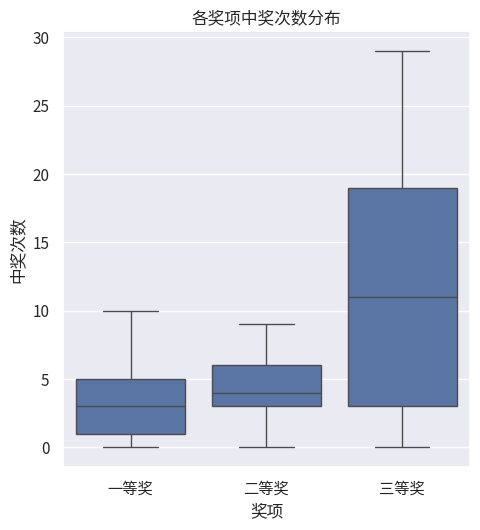

In [5]:
# 中奖次数箱线图
plt.figure(figsize=(14, 10))
plt.subplot(2, 3, 3)
prize_data = data[['一等奖', '二等奖', '三等奖']].melt()
sns.boxplot(x='variable', y='value', data=prize_data)
plt.title('各奖项中奖次数分布')
plt.xlabel('奖项')
plt.ylabel('中奖次数')
plt.tight_layout()

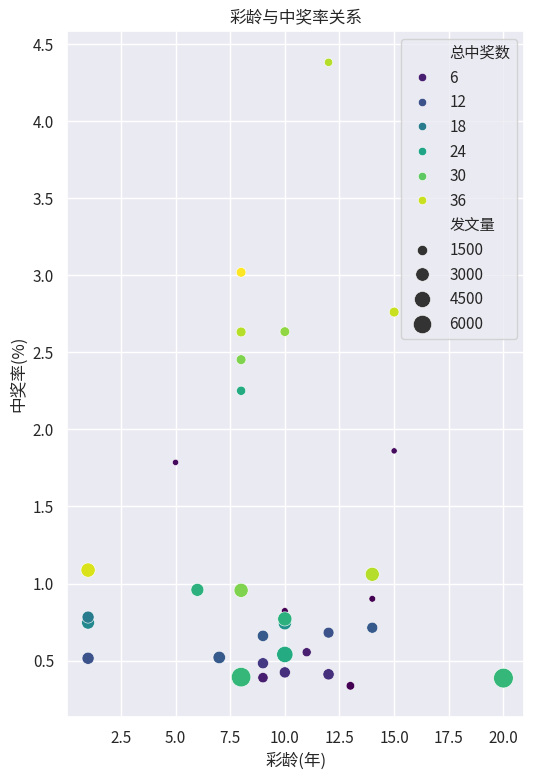

In [6]:
# 彩龄与中奖率散点图
plt.figure(figsize=(15, 15))
plt.subplot(2, 3, 4)
sns.scatterplot(x='彩龄', y='中奖率', data=data, size='发文量', sizes=(20, 200), hue='总中奖数', palette='viridis')
plt.title('彩龄与中奖率关系')
plt.xlabel('彩龄(年)')
plt.ylabel('中奖率(%)')
plt.tight_layout()

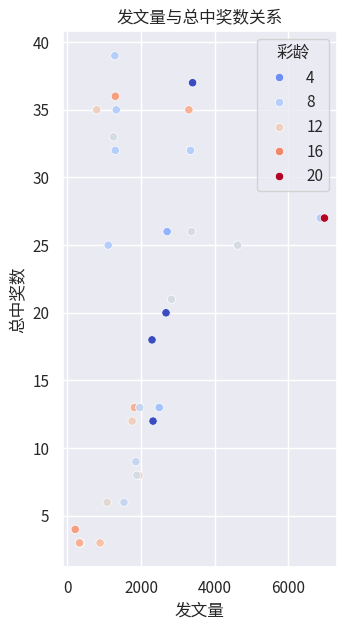

In [7]:
# 发文量与总中奖数散点图
plt.figure(figsize=(10, 12))
plt.subplot(2, 3, 5)
sns.scatterplot(x='发文量', y='总中奖数', data=data, hue='彩龄', palette='coolwarm')
plt.title('发文量与总中奖数关系')
plt.xlabel('发文量')
plt.ylabel('总中奖数')
plt.tight_layout()

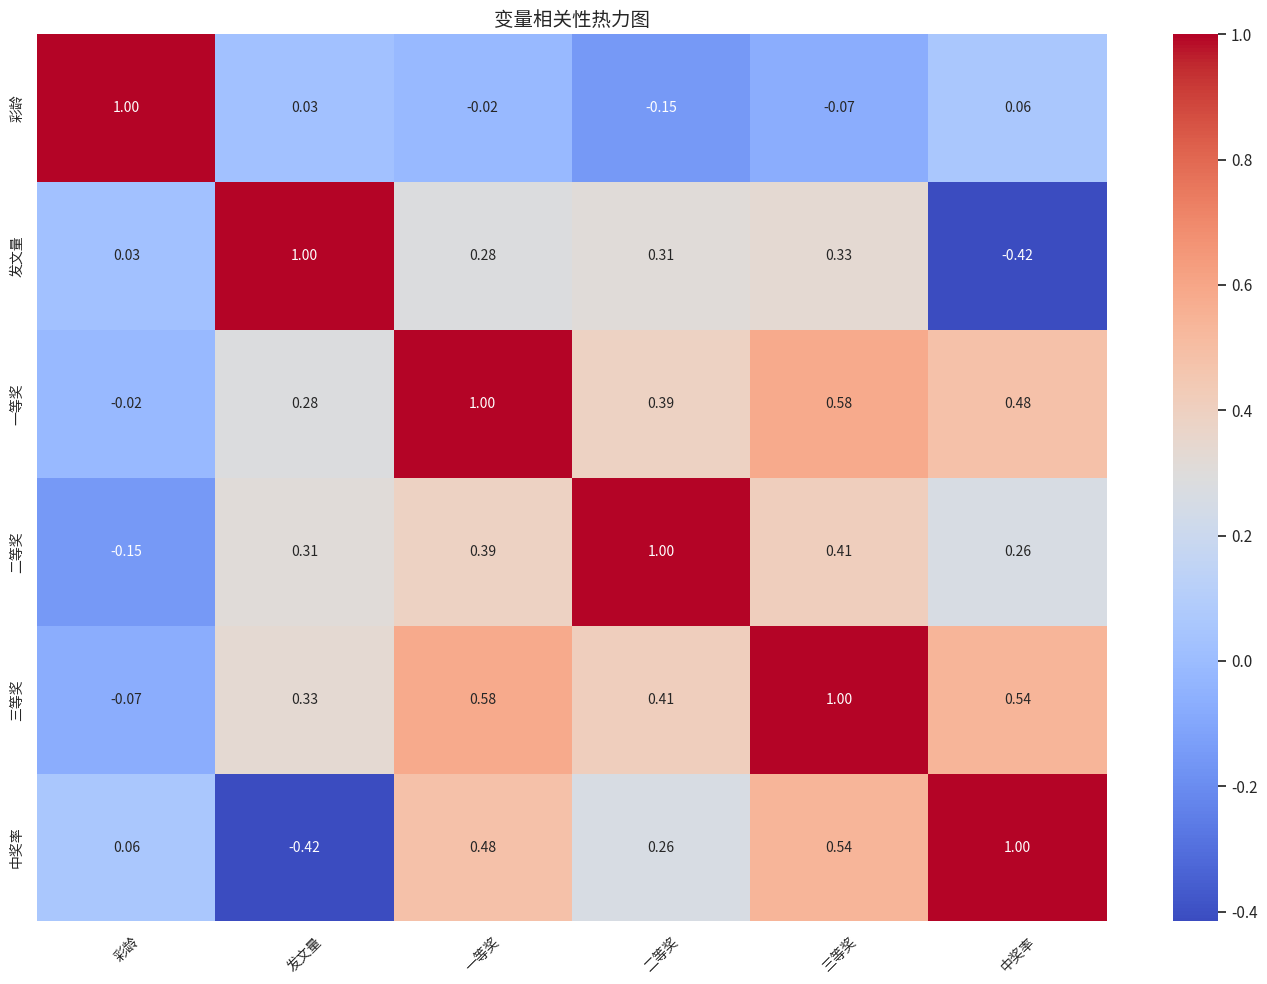

In [8]:
# 相关性热力图
plt.figure(figsize=(14, 10))
correlation = data[['彩龄', '发文量', '一等奖', '二等奖', '三等奖', '中奖率']].corr()
sns.heatmap(correlation, annot=True, cmap='coolwarm', fmt='.2f', annot_kws={'size': 10})
plt.title('变量相关性热力图', fontsize=14)
plt.xticks(fontsize=10, rotation=45)
plt.yticks(fontsize=10)
plt.tight_layout()

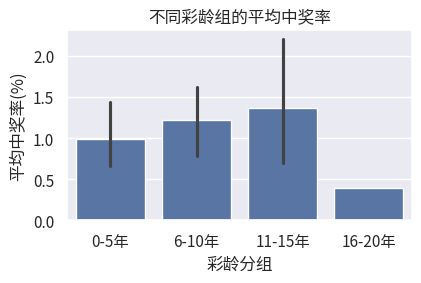

In [9]:
# 彩龄分组
experience_groups = pd.cut(data['彩龄'], bins=[0, 5, 10, 15, 20], labels=['0-5年', '6-10年', '11-15年', '16-20年'])
data['彩龄分组'] = experience_groups

# 不同彩龄组的平均中奖率
plt.figure(figsize=(8, 3))
plt.subplot(1, 2, 1)
sns.barplot(x='彩龄分组', y='中奖率', data=data, estimator=np.mean)
plt.title('不同彩龄组的平均中奖率')
plt.xlabel('彩龄分组')
plt.ylabel('平均中奖率(%)')
plt.tight_layout()

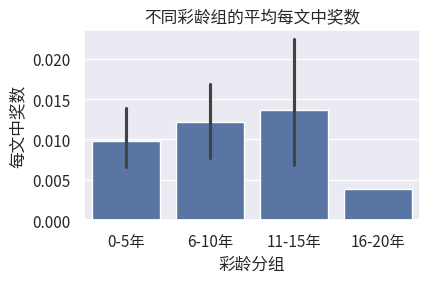

In [10]:
# 不同彩龄组的平均每文中奖数
data['每文中奖数'] = data['总中奖数'] / data['发文量']
plt.figure(figsize=(8, 3))
plt.subplot(1, 2, 2)
sns.barplot(x='彩龄分组', y='每文中奖数', data=data, estimator=np.mean)
plt.title('不同彩龄组的平均每文中奖数')
plt.xlabel('彩龄分组')
plt.ylabel('每文中奖数')
plt.tight_layout()

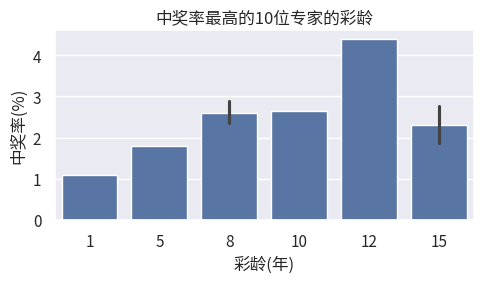

In [11]:
# 中奖率排名前10的专家
top_winners = data.sort_values(by='中奖率', ascending=False).head(10)
plt.figure(figsize=(5, 3))
sns.barplot(x='彩龄', y='中奖率', data=top_winners)
plt.title('中奖率最高的10位专家的彩龄')
plt.xlabel('彩龄(年)')
plt.ylabel('中奖率(%)')
plt.tight_layout()